In [2]:
#1) Import Pandas, Matplotlib, Numpy, Statsmodels, Seaborn, and Scipy.  Do not use any other libraries.  No output is necessary here.
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.diagnostic import het_white, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy.stats import shapiro

#2) Import your CSV file into Python as a Pandas dataframe.  Print the top five rows and data types for each variable.
df = pd.read_csv('C:/Users/rupas/Desktop/Student_GPA_Prediction/student_performance.csv')

print(df.head())#Printing top five rows
print(df.dtypes)#Printing data types of variables

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196           2  
1             0  3

In [3]:
#3) Use Pandas to calculate summary statistics
df.describe() #summary statistics

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


c:\Users\rupas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


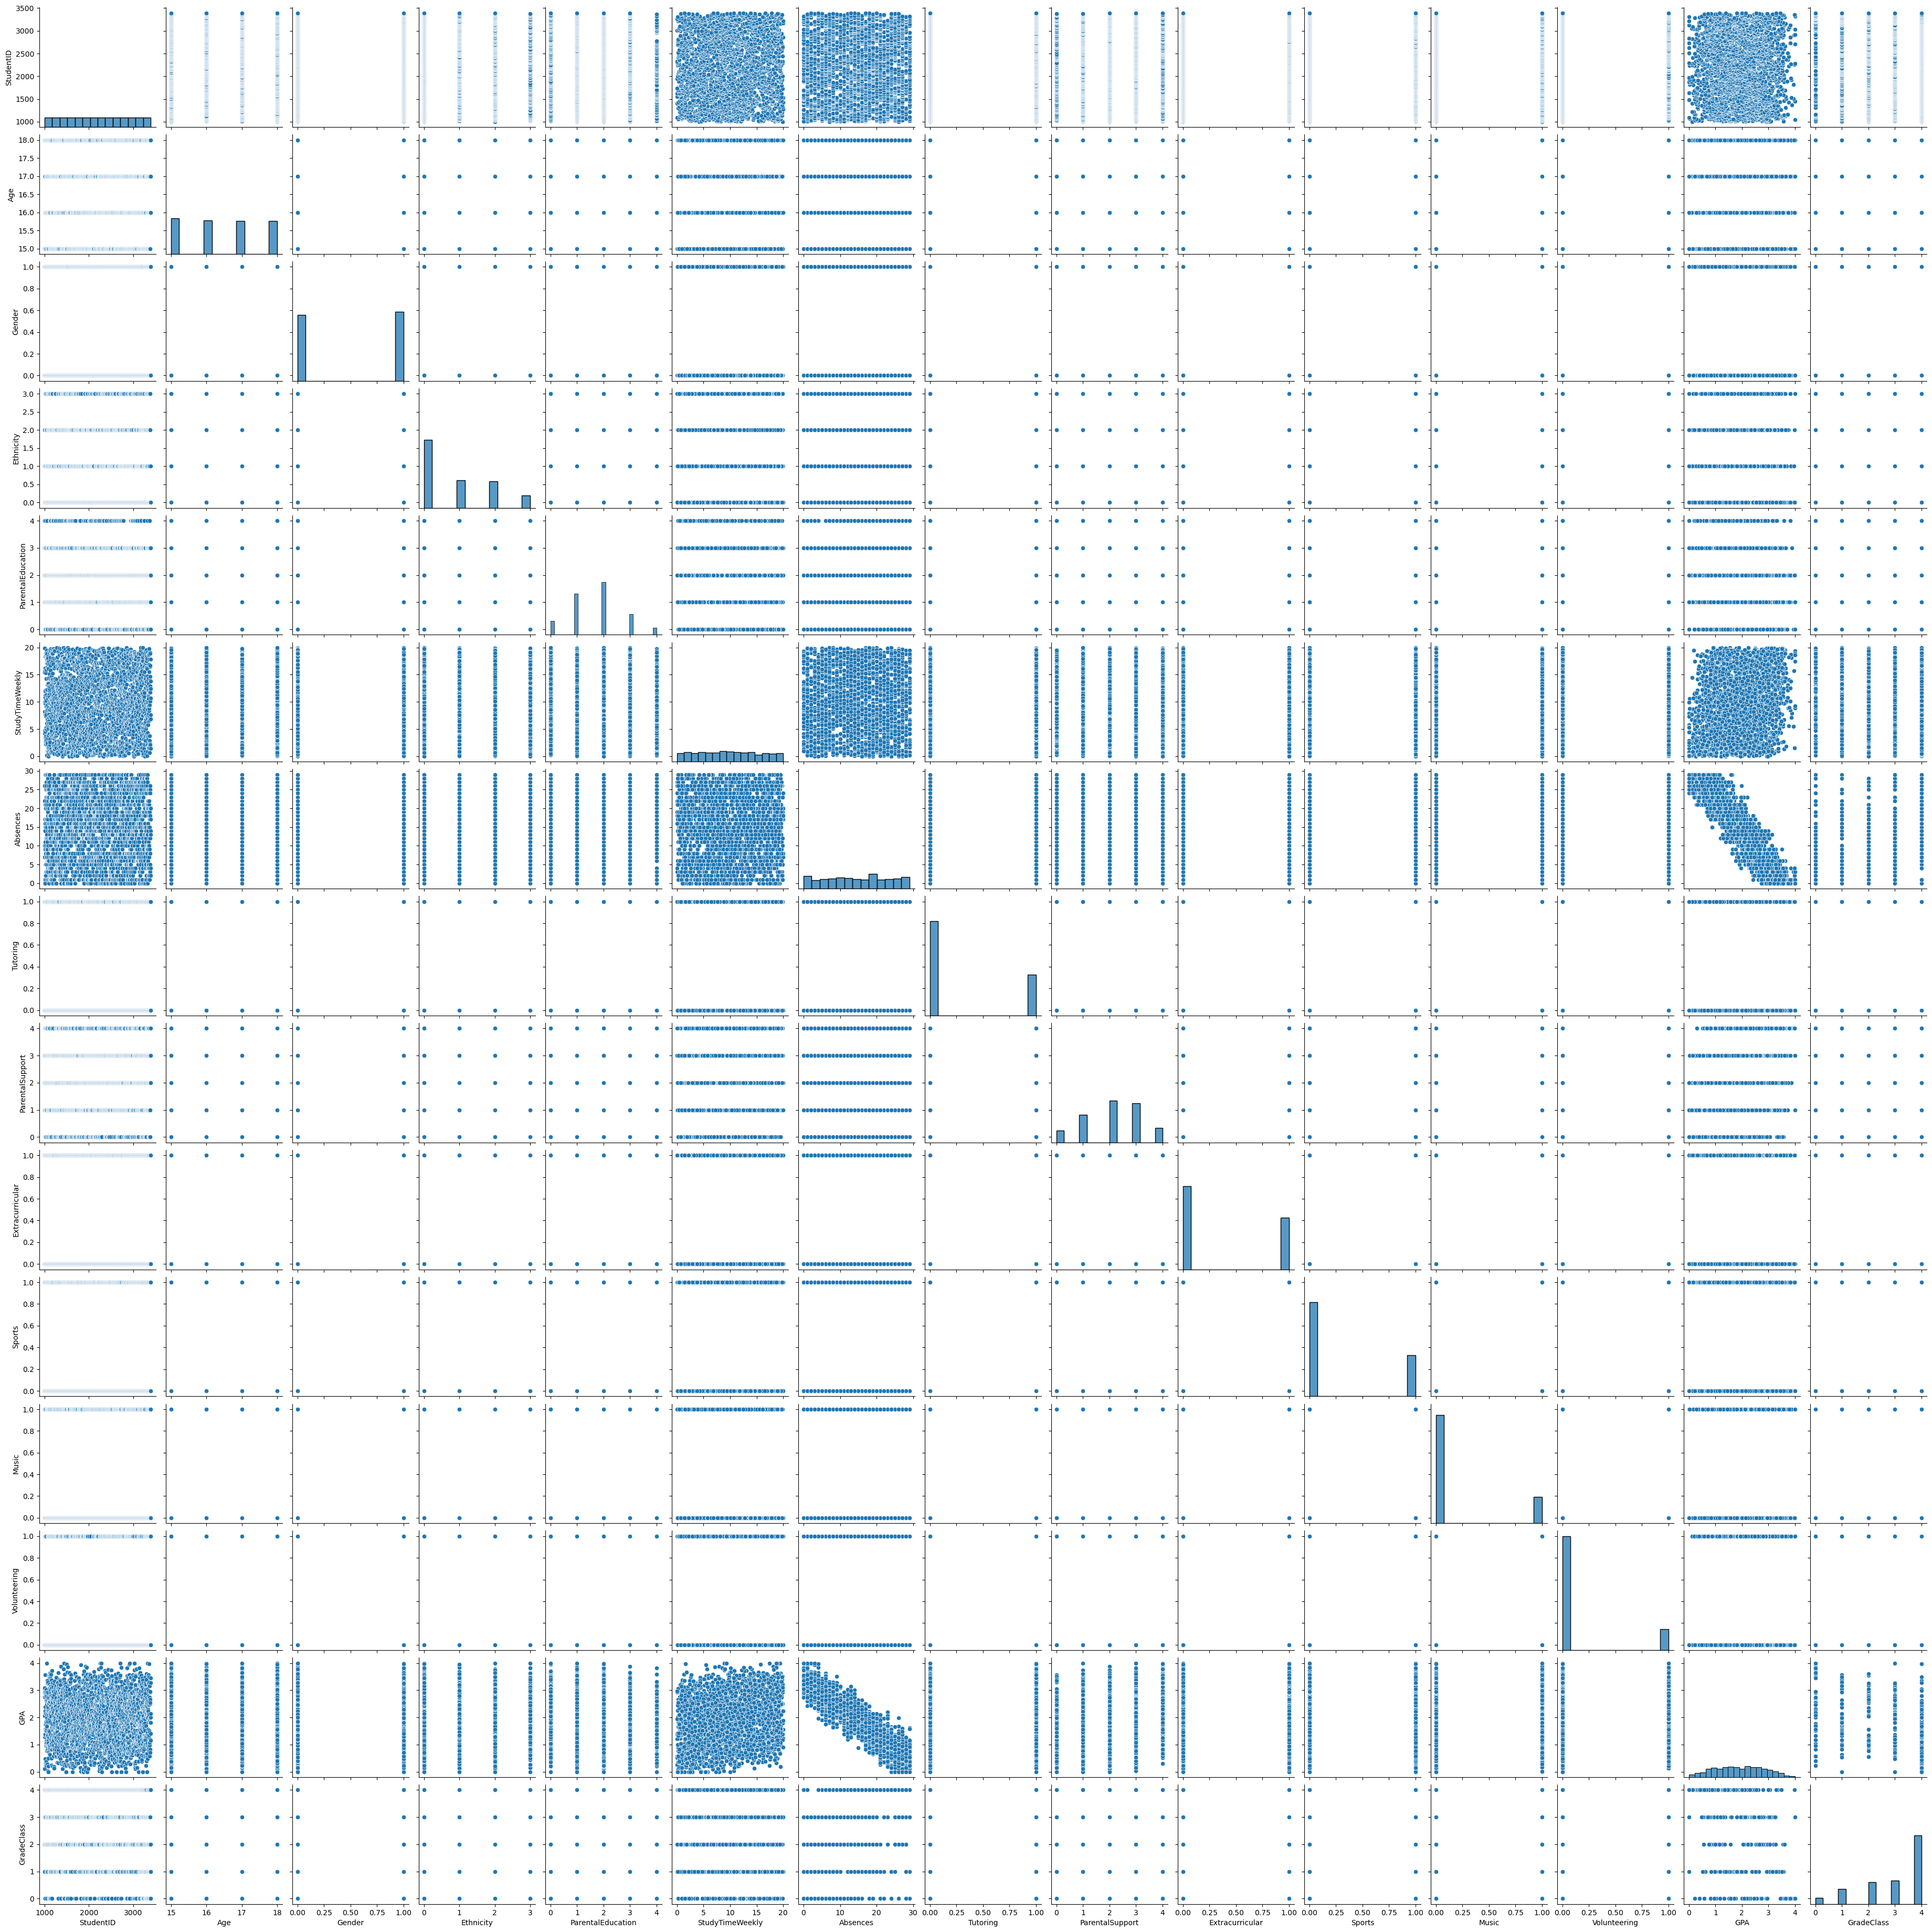

In [4]:
#4) Use Seaborn’s pairplot function to produce the big graphic plotting each variable against each other variable.
sns.pairplot(df)

c:\Users\rupas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\rupas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\rupas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\rupas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\rupas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


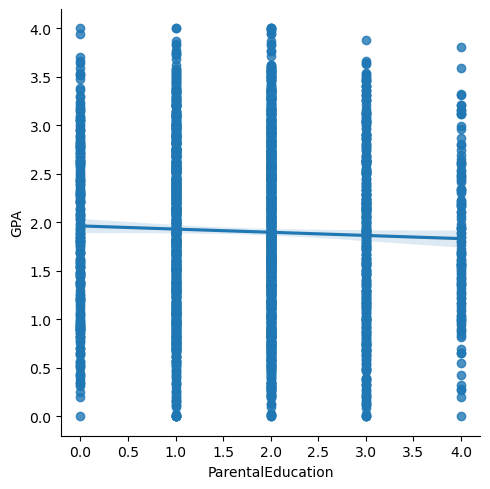

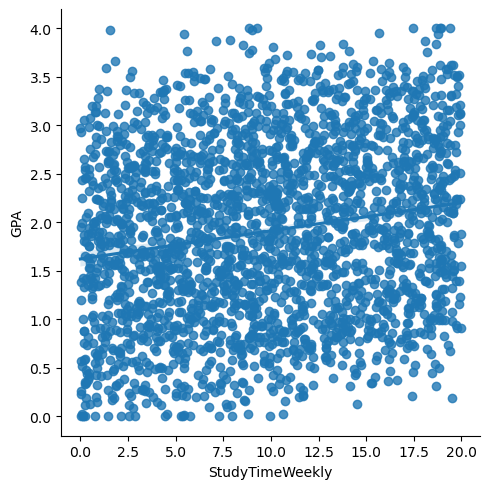

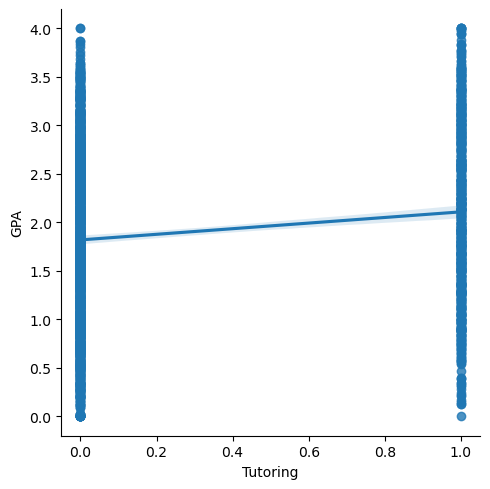

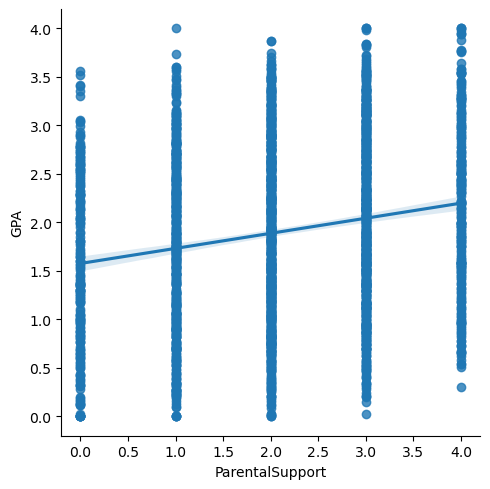

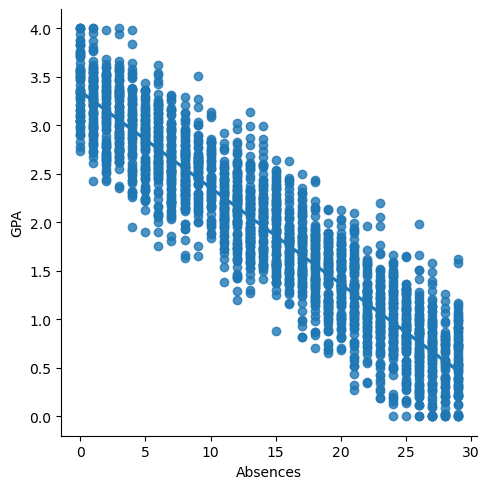

In [5]:
#5) Create a list of your independent variables and use a loop to create a plot of each one against your dependent variable.  
y = df['GPA']#dependent variable
xvars = ['ParentalEducation', 'StudyTimeWeekly', 'Tutoring','ParentalSupport','Absences']#independent variable
X = df[xvars]

#Plotting independent variable against the dependent variable using for loop in independent variable
for i in xvars:
    sns.lmplot(x=i,y='GPA', fit_reg=True, data=df)


In [6]:
#6) Create three different linear regression models using different subsets of independent variables.  Print the regression results for each.

#model 1
model1 = sm.OLS.from_formula('GPA ~ ParentalEducation+StudyTimeWeekly', df)
results1 = model1.fit()
results1.summary()

#model 2
model2 = sm.OLS.from_formula('GPA ~ ParentalEducation+StudyTimeWeekly+Tutoring+ParentalSupport', df)
results2 = model2.fit()
results2.summary()

#model 3
model3 = sm.OLS.from_formula('GPA ~ ParentalEducation+StudyTimeWeekly+Tutoring+ParentalSupport+Absences', df)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     6430.
Date:                Tue, 21 Jan 2025   Prob (F-statistic):               0.00
Time:                        12:48:13   Log-Likelihood:                 14.645
No. Observations:                2392   AIC:                            -17.29
Df Residuals:                    2386   BIC:                             17.39
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.6640      0.018    146.303      0.000       2.628       2.700
ParentalEducation     0.0047      0.005      0.953      0.341      -0.005       0.014
StudyTimeWeekly       0.0288      0.001     32.964      0.000       0.027       0.030
Tutoring              0.2511      0.011     23.388      0.000       0.230       0.272
ParentalSupport       0.1520      0.004     34.640      0.000       0.143       0.161
Absences             -0.0994      0.001   -170.754      0.000      -0.101      -0.098
==============================================================================
Omnibus:                        2.819   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.244   Jarque-Bera (JB):                2.834
Skew:                           0.084   Prob(JB):                        0.242
Kurtosis:                       2.981   Cond. No.                         73.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
#7) Compare your models using the four different selection statistics we discussed. (R^2, AIC…) and select one as your best model.
models = ['model1','model2','model3']
r_squared = [results1.rsquared, results2.rsquared, results3.rsquared]   #r-squared values list for each model
adj_r_squared = [results1.rsquared_adj, results2.rsquared_adj, results3.rsquared_adj] #adjusted r-squared values list for each model
aic = [results1.aic, results2.aic, results3.aic]#AIC values list for each model
bic = [results1.bic, results2.bic, results3.bic]#BIC values list for each model

#creating dictionary for organizing the model comparison data
data = {
    'Model': models,
    'R-squared': r_squared,
    'Adjusted R-squared': adj_r_squared,
    'AIC': aic,
    'BIC': bic
}
df_stats = pd.DataFrame(data)#creating dataframe for displaying comparison results

print(df_stats)#printing the dataframe to see comparison of all models



    Model  R-squared  Adjusted R-squared          AIC          BIC
0  model1   0.033287            0.032478  6288.069836  6305.409492
1  model2   0.086667            0.085137  6156.201559  6185.100985
2  model3   0.930913            0.930768   -17.289835    17.389476


In [8]:
#Among the three model we can say that model 3 is the best because it has the highest values for both R-squared and adjusted R-squared, and the lowest values for AIC and BIC when compared to the other two models.
print('Model 3 is the best of the three models.')

Model 3 is the best of the three models.


In [9]:
#8) Calculate the variance inflation factor for your independent variables to check for multicollinearity.  Print the results and tell me if you think multicollinearity was detected.  If it was, make the appropriate modifications to your model before proceeding.
#A commonly used threshold is VIF > 5 or VIF > 10 to identify problematic multicollinearity.
vif = pd.DataFrame()
vif["Variable"] = X.columns
#VIF shows how much a variable is inflated due to correlations with other variables
#calculating VIF for each features using list comprehension and the variance_inflation_factor function
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factor (VIF) for Multicollinearity:")
print(vif)

Variance Inflation Factor (VIF) for Multicollinearity:
            Variable       VIF
0  ParentalEducation  3.151969
1    StudyTimeWeekly  3.207500
2           Tutoring  1.386923
3    ParentalSupport  3.425144
4           Absences  3.175542


In [10]:
#Variables with VIF greater than 1, 5, and 10
vif_greater_than_1 = vif[vif['VIF'] > 1]['Variable'].tolist() #identifying variables with VIF > 1
vif_greater_than_5 = vif[vif['VIF'] > 5]['Variable'].tolist() #identifying variables with VIF > 5
vif_greater_than_10 = vif[vif['VIF'] > 10]['Variable'].tolist() #identifying variables with VIF > 10
print("Variables with VIF > 5:", vif_greater_than_5)
print("Variables with VIF > 10:", vif_greater_than_10)

Variables with VIF > 5: []
Variables with VIF > 10: []


In [11]:
#All VIF values are less than 5 and none are greater than 10 so there is no significant multicollinearity. Therefore the predictor variable is not highly correlated with eachother.

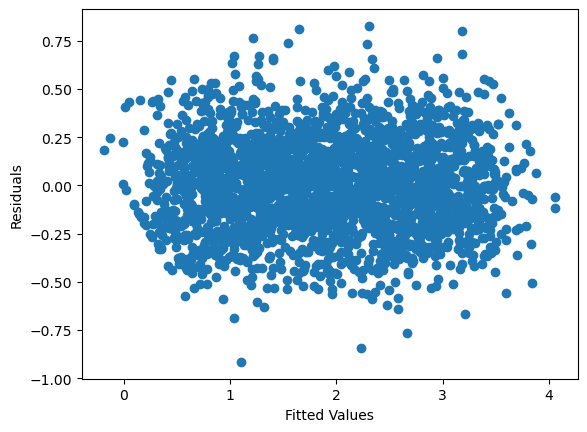

In [12]:
#9) Using your best model, create a variable containing the predicted values of Y, called y-hat, and a variable containing the residuals called e. Make a scatterplot with the residuals on the y-axis and the predicted values on the x-axis.  
yhat3 = results3.fittedvalues #y-hat
e3 = results3.resid #residuas
df['e3'] = e3
plt.scatter(yhat3, e3) #scatter plot
plt.xlabel('Fitted Values')  # X-axis label
plt.ylabel('Residuals')  # Y-axis label
plt.show()

(array([  3.,  10.,  99., 326., 597., 655., 454., 188.,  48.,  12.]),
 array([-0.91544139, -0.741112  , -0.56678261, -0.39245321, -0.21812382,
        -0.04379443,  0.13053496,  0.30486435,  0.47919374,  0.65352314,
         0.82785253]),
 <BarContainer object of 10 artists>)

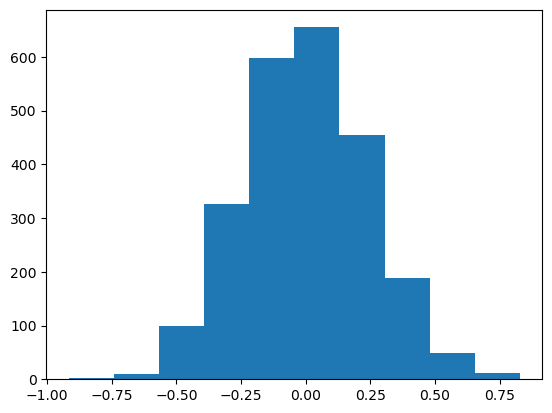

In [13]:
#10) Plot a histogram of your residuals to check that they’re normally distributed.  Tell me if you think they are normally distributed or not.  
plt.hist(e3)

In [14]:
#Statistical test for normally distributed residuals - Shapiro-Wilk
#HO: Normally distributed data, HA: Non-normally distributed data
#If p-value is less than alpha, reject null of normally distributed data
shapiro_test = shapiro(e3) #Shapiro test in residuals 'e3'
shapiro_stat = shapiro_test[0]
shapiro_p = shapiro_test[1] #p value from sharpio-wilk test

alpha = 0.05
shapiro_p < alpha

False

In [15]:
#False means that the p-value is greater than 0.05, so we fail to reject the null hypothesis which means it is likely normally distributed.

In [16]:
#11) Use a statistical test to test for heteroskedasticity (BP test).  Tell me if you think heteroskedasticity is present or not.
#Statistical tests for heteroskedasticity - Breusch Pagan and White
#HO: homoskedasticity, HA: heteroskedasticity

white_test = het_white(e3, results3.model.exog)
bp_test = het_breuschpagan(e3, results3.model.exog)
print("White's Test P-Value")
print("LM P-value:", white_test[1])
print("Breusch Pagan Test P-Value:",bp_test[3])

#Interpretation:
#If the p-value of White's test is above the significance level (e.g., 0.05), we fail to reject the null hypothesis of homoskedasticity.
#If the p-value of Breusch-Pagan test is above the significance level (e.g., 0.05), we fail to reject the null hypothesis of homoskedasticity.

if bp_test[3] < alpha and white_test[1] < alpha:
    print("Both tests indicate significant heteroskedasticity in the model's residuals.")
else:
    print("No significant heteroskedasticity detected in the model's residuals.")


White's Test P-Value
LM P-value: 0.8768116139291476
Breusch Pagan Test P-Value: 0.3258718714939456
No significant heteroskedasticity detected in the model's residuals.


In [17]:
#12) Standardize your residuals to check for outliers.  Do any of your observations meet the rule of thumb threshold?  

#Outlier Detection - Standardized residuals
residuals_stdev = df['e3'].std() # Standard deviation of residuals
standardized_residuals = df['e3']/residuals_stdev # Standardized residuals

standardized_residuals
outliers = np.where(np.abs(standardized_residuals) > 3)[0] # Detect outliers (threshold of 3)
outliers


array([ 211,  348,  607, 1557, 1615, 1944, 2172, 2275, 2354], dtype=int64)

In [18]:
# Rule of Thumb: If standardized residual > 3 or < -3, it is an outlier
#The observation with standardized residuals greater than 3 are considered outliers.
#The obervation meet the rule of thumb threshold for outliers based on standardized residuals.

In [19]:
#Outlier Detection - Studentized residuals
influence = results3.get_influence()#Get influence measures
studentized_residuals = influence.resid_studentized_external#Calculate studentized residuals

#Identify outliers using the common thresholds 
mild_outliers = np.where(np.abs(studentized_residuals)>2)[0]
extreme_outliers = np.where(np.abs(studentized_residuals)>3)[0]

print("Mild outliers",mild_outliers)
print("Extreme Outliers",extreme_outliers)

Mild outliers [   4  142  188  197  211  220  226  228  269  286  297  307  330  348
  359  371  395  399  401  510  511  527  538  547  553  570  591  607
  625  626  659  669  682  717  786  794  814  819  837  847  907  947
  955  984 1030 1036 1085 1088 1092 1099 1105 1161 1187 1190 1192 1193
 1198 1221 1234 1253 1260 1263 1267 1289 1303 1314 1357 1396 1420 1421
 1472 1509 1557 1615 1624 1637 1638 1664 1679 1691 1826 1832 1837 1861
 1867 1919 1923 1944 2029 2048 2080 2086 2100 2102 2127 2142 2143 2148
 2150 2172 2255 2267 2275 2354]
Extreme Outliers [ 211  348  607 1557 1615 1944 2172 2275 2354]


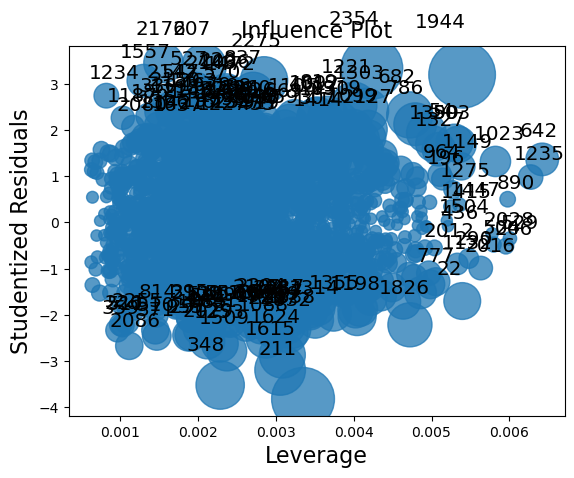

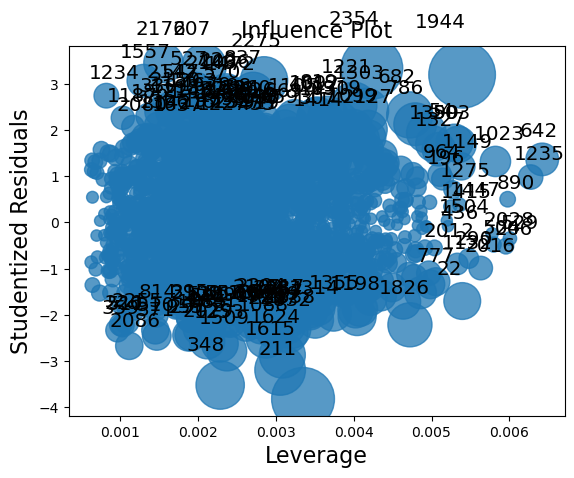

In [20]:
#Outlier detection - Influence Plot - Leverage vs Studentized Residuals
sm.graphics.influence_plot(results3, criterion="cooks")

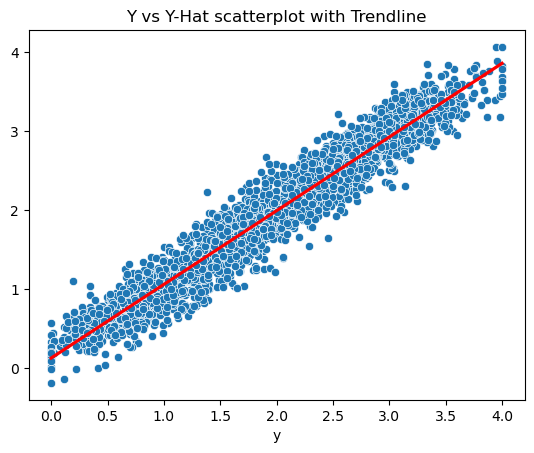

In [21]:
#13) Create a scatterplot of Y vs Y-Hat.  Include a trendline.
sns.scatterplot(x=y, y=yhat3)
sns.regplot(x=y, y=yhat3,scatter=False, color='red')
plt.xlabel('y')
plt.title('Y vs Y-Hat scatterplot with Trendline')
plt.show()


c:\Users\rupas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\rupas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\rupas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\rupas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\rupas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


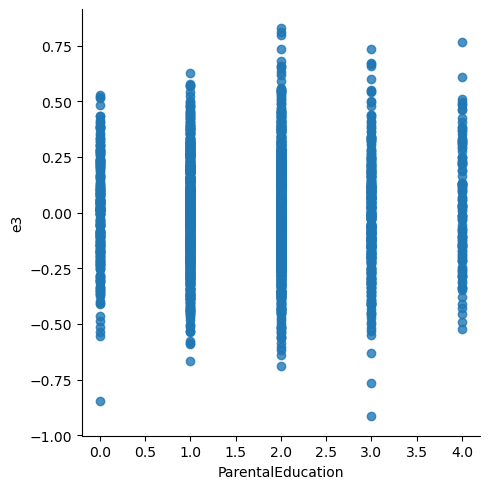

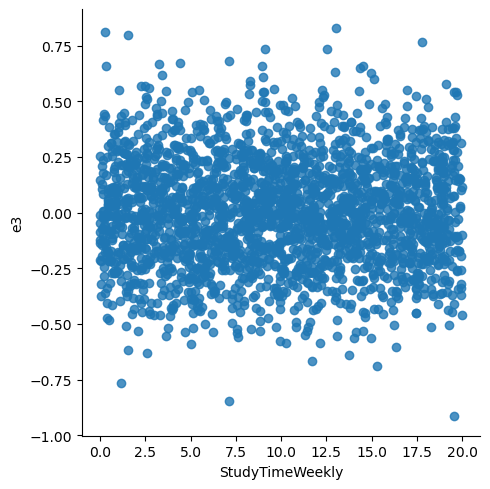

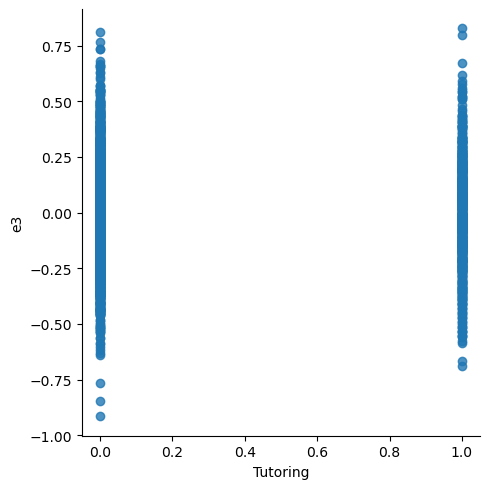

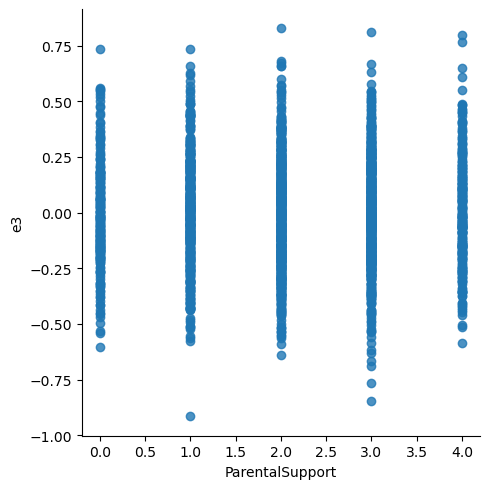

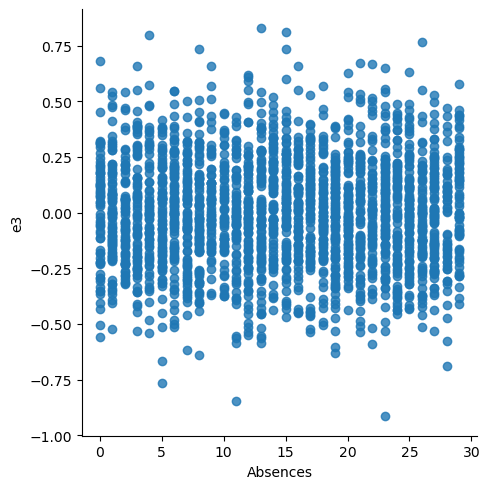

In [22]:
#14) Create a loop that loops through your x-variables and plots them against your residuals.  Display the plots.  Tell me if you see any problematic patterns.
for i in xvars:
     sns.lmplot(x=i, y= 'e3', data=df, fit_reg=False)

In [23]:
#The plots dont indicate problematic pattern since data are tightly clustured

In [24]:
#15) Create a new dataframe with five hypothetical observations’ worth of x-values and use the predict function to calculate the estimated y values for each set of x values.
predictions = pd.DataFrame({
    'ParentalEducation':[ 2,4,0,1,3], 
    'StudyTimeWeekly':[11,25,17,32,39], 
    'Tutoring':[0,0,1,1,0],
    'ParentalSupport':[2,1,3,1,1],
    'Absences':[7,10,0,14,4]})

predictions['Estimated GPA'] = results3.predict(predictions)
print(predictions)

   ParentalEducation  StudyTimeWeekly  Tutoring  ParentalSupport  Absences  \
0                  2               11         0                2         7   
1                  4               25         0                1        10   
2                  0               17         1                3         0   
3                  1               32         1                1        14   
4                  3               39         0                1         4   

   Estimated GPA  
0       2.597965  
1       2.559642  
2       3.859965  
3       2.600367  
4       3.553787  
